# Grape Disease Detection Data

### In this project, we will train grape diseases and their varieties. For this, we will first scan the pictures of grape diseases in the folder containing their pictures, then reduce their size and normalize them, and then train them with deep learning.
### Finally, we will re-train the images with Transfer Learning

<a href='https://www.kaggle.com/datasets/rm1000/augmented-grape-disease-detection-dataset' target=_blank>You can find the data file here</a>

<img src=https://scx2.b-cdn.net/gfx/news/2018/11-newinsightin.jpg width='400'>

In [1]:
#pip install opencv-python

In [44]:
import cv2
import pandas as pd
import os

In [45]:
labels = ['Black Rot','ESCA','Healthy','Leaf Blight']
img_path = '/kaggle/input/augmented-grape-disease-detection-dataset/Final Training Data/'

In [46]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)

In [47]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [48]:
df.sample(10)

,img,label
4224,/kaggle/input/augmented-grape-disease-detectio...,ESCA
6748,/kaggle/input/augmented-grape-disease-detectio...,Healthy
4191,/kaggle/input/augmented-grape-disease-detectio...,ESCA
4536,/kaggle/input/augmented-grape-disease-detectio...,ESCA
3316,/kaggle/input/augmented-grape-disease-detectio...,ESCA
1763,/kaggle/input/augmented-grape-disease-detectio...,Black Rot
1952,/kaggle/input/augmented-grape-disease-detectio...,Black Rot
5117,/kaggle/input/augmented-grape-disease-detectio...,ESCA
9751,/kaggle/input/augmented-grape-disease-detectio...,Leaf Blight
10304,/kaggle/input/augmented-grape-disease-detectio...,Leaf Blight


In [49]:
d={'Black Rot':0,'ESCA':1,'Healthy':2,'Leaf Blight':3}

In [50]:
df['encode_label']=df['label'].map(d)

In [51]:
df.sample(5)

,img,label,encode_label
333,/kaggle/input/augmented-grape-disease-detectio...,Black Rot,0
631,/kaggle/input/augmented-grape-disease-detectio...,Black Rot,0
4949,/kaggle/input/augmented-grape-disease-detectio...,ESCA,1
6165,/kaggle/input/augmented-grape-disease-detectio...,Healthy,2
6552,/kaggle/input/augmented-grape-disease-detectio...,Healthy,2


In [52]:
import numpy as np

In [53]:
import matplotlib.pyplot as plt

In [54]:
image=cv2.imread(str(df['img'][55]))

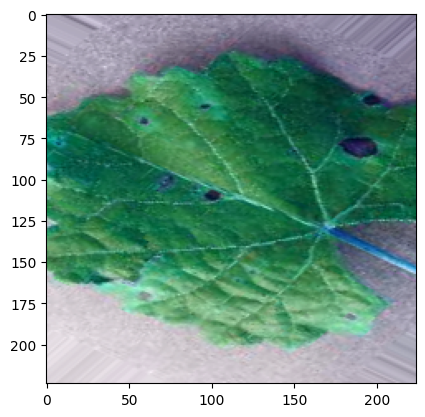

In [55]:
plt.imshow(image);

In [56]:
import os

img_list = []
label_list = []

valid_extensions = ['.jpg','.png']

for label in labels:
    for img_file in os.listdir(img_path + label):
        ext = os.path.splitext(img_file)[1]
        if ext.lower() in valid_extensions:
            img_list.append(img_path + label + '/' + img_file)
            label_list.append(label)

In [57]:
x=[]
for img in df['img']:
    img=cv2.imread(img)
    img=cv2.resize(img,(50,50)) 
    img=img/255.0    
    x.append(img)

In [58]:
x=np.array(x)

In [59]:
x

array([[[[0.7254902 , 0.75294118, 0.8       ],
         [0.71372549, 0.7372549 , 0.78823529],
         [0.71764706, 0.74117647, 0.79215686],
         ...,
         [0.70980392, 0.7254902 , 0.80392157],
         [0.70196078, 0.71764706, 0.79215686],
         [0.58039216, 0.59607843, 0.6745098 ]],

        [[0.69019608, 0.71764706, 0.76862745],
         [0.64705882, 0.6745098 , 0.72156863],
         [0.64705882, 0.6745098 , 0.72156863],
         ...,
         [0.72156863, 0.7372549 , 0.81568627],
         [0.68627451, 0.70588235, 0.77647059],
         [0.62352941, 0.63921569, 0.71764706]],

        [[0.67058824, 0.69803922, 0.74901961],
         [0.65490196, 0.68235294, 0.73333333],
         [0.69411765, 0.72156863, 0.76862745],
         ...,
         [0.71372549, 0.72941176, 0.80784314],
         [0.69019608, 0.70588235, 0.78431373],
         [0.7254902 , 0.74117647, 0.81960784]],

        ...,

        [[0.75686275, 0.77254902, 0.79607843],
         [0.82352941, 0.82745098, 0.84705882]

In [60]:
y=df['encode_label']

In [61]:
y.value_counts()

encode_label
0    3000
1    3000
2    3000
3    3000
Name: count, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [64]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Input, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [65]:
model = Sequential()
model.add(Input(shape=(50,50, 3)))


model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model. add (BatchNormalization ())
model.add(Conv2D(84, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(120, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dropout(.25))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [66]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=30,verbose=1)

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 102s 330ms/step - accuracy: 0.7227 - loss: 0.6878 - val_accuracy: 0.5529 - val_loss: 1.0031
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 98s 327ms/step - accuracy: 0.9019 - loss: 0.2588 - val_accuracy: 0.8767 - val_loss: 0.2796
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 97s 325ms/step - accuracy: 0.9498 - loss: 0.1436 - val_accuracy: 0.8933 - val_loss: 0.2607
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 142s 326ms/step - accuracy: 0.9632 - loss: 0.1072 - val_accuracy: 0.8554 - val_loss: 0.4528
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 141s 324ms/step - accuracy: 0.9701 - loss: 0.0927 - val_accuracy: 0.9729 - val_loss: 0.0815
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 142s 324ms/step - accuracy: 0.9766 - loss: 0.0751 - val_accuracy: 0.9379 - val_loss: 0.1838
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 142s 324ms/step - accuracy: 0.9796 - loss: 0.0632 - val_accuracy: 0.9229 - val_loss: 0.2028
Epoch 8/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 142s 323ms/step - accuracy: 0.9762 - l

In [67]:
loss,accuracy=model.evaluate(x_test,y_test)

75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.9724 - loss: 0.1060


In [68]:
accuracy

0.9700000286102295

In [69]:
tahmin=model.predict(x_test)

75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step


In [70]:
model.save('model.h5')

In [71]:
import matplotlib.pyplot as plt

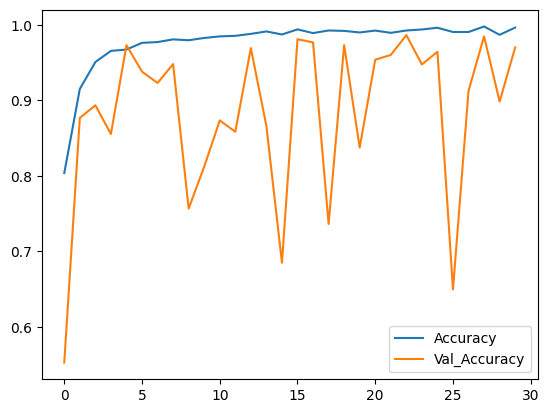

In [72]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

In [73]:
loss_f=pd.DataFrame(history.history)

<Axes: >

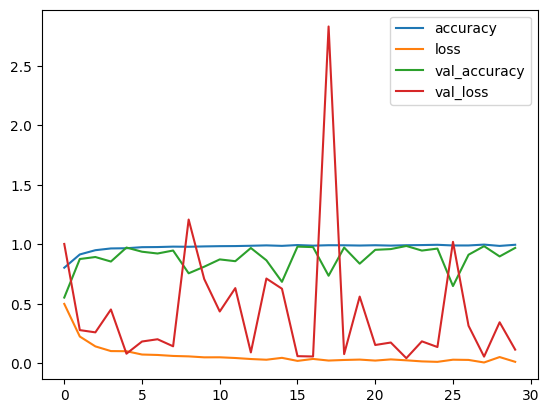

In [74]:
loss_f.plot()

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [76]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[606,   5,   1,   0],
       [  3, 621,   0,   0],
       [  0,   0, 568,   0],
       [ 46,   2,  15, 533]])

In [77]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

In [78]:
import seaborn as sns

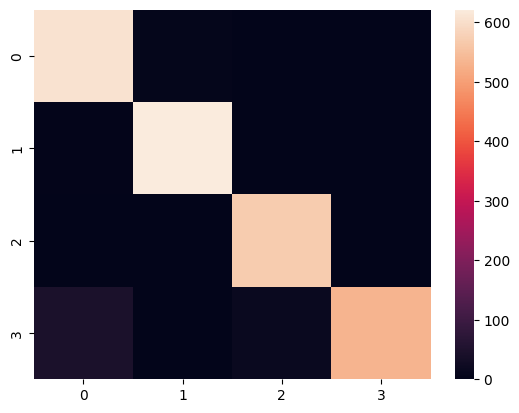

In [79]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [80]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       612
           1       0.99      1.00      0.99       624
           2       0.97      1.00      0.99       568
           3       1.00      0.89      0.94       596

    accuracy                           0.97      2400
   macro avg       0.97      0.97      0.97      2400
weighted avg       0.97      0.97      0.97      2400



## Transfer Learning

In [81]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout,BatchNormalization, Reshape
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [85]:
data_dir='/kaggle/input/augmented-grape-disease-detection-dataset/Final Training Data'
img_width,img_heigth=224,224   

train_datagen=ImageDataGenerator(rescale=1/255, validation_split=.20)

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_heigth),
                                class_mode='categorical', subset='training')

test_datagen=ImageDataGenerator(rescale=1/255)
test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_heigth),
                                class_mode='categorical', subset='validation') 

base_model=VGG16(weights='/kaggle/input/zmicin/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
                 input_shape=(img_width,img_heigth,3),include_top=False) 

model=Sequential()

model.add(base_model)                 
for layer in base_model.layers:
    layer.trainable=False

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_datagenerator,epochs=10,validation_data=test_datagenerator)

Found 9600 images belonging to 4 classes.
Found 2400 images belonging to 4 classes.
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


300/300 ━━━━━━━━━━━━━━━━━━━━ 3410s 11s/step - accuracy: 0.8141 - loss: 1.9023 - val_accuracy: 0.9496 - val_loss: 0.1491
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3433s 11s/step - accuracy: 0.9697 - loss: 0.0770 - val_accuracy: 0.9783 - val_loss: 0.0696
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3439s 11s/step - accuracy: 0.9911 - loss: 0.0261 - val_accuracy: 0.9808 - val_loss: 0.0557
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3434s 11s/step - accuracy: 0.9935 - loss: 0.0207 - val_accuracy: 0.9679 - val_loss: 0.0991
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3468s 11s/step - accuracy: 0.9792 - loss: 0.0551 - val_accuracy: 0.9758 - val_loss: 0.0799
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3546s 12s/step - accuracy: 0.9924 - loss: 0.0183 - val_accuracy: 0.9733 - val_loss: 0.0732
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3551s 12s/step - accuracy: 0.9976 - loss: 0.0073 - val_accuracy: 0.9792 - val_loss: 0.0767
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3518s 12s/step - accuracy: 0.9988 - loss: 0.0036 - val

In [ ]:
model.save('model1.h5')

In [ ]:
model.save('molel1.keras')


### In this lesson, we got the values ​​of accuracy: 0.9724 - loss: 0.1060 with Deep learning, and accuracy: 0.9930 - loss: 0.0234 - val_accuracy: 0.9779 - val_loss: 0.0678 with Transfer learning